# Calculating energy surfaces of binary systems

It is very common in CALPHAD modeling to directly examine the Gibbs energy surface of all the constituent phases in a system.

Below we show how the Gibbs energy of all phases may be calculated as a function of composition at a given temperature (2800 K).

Note that the chi phase has additional, internal degrees of freedom which allow it to take on multiple states for a given overall composition. Only the low-energy states are relevant to calculating the equilibrium phase diagram.

## Importing modues

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

from pycalphad import Database, calculate #caculate is for non-equilibrium properties while equilibrium is for eq prop
from pycalphad.plot.utils import phase_legend
import numpy as np

### Defining file paths for program and database

In [16]:
# Set the file path
directory = r'C:\Users\jose.muniz\Documents\Projects\SLM\Pycalphad\Energy surfaces of binary systems\\'
tdb_diretory = r'C:\Users\jose.muniz\Documents\Projects\SLM\Pycalphad\databases\\'

## Load database

In [18]:
tdb = Database(tdb_diretory + 'nbre_liu.tdb') #Nb-Re database

## Load phases that will be considered

In [19]:
phases = ['CHI_RENB', 'SIGMARENB', 'FCC_RENB', 'LIQUID_RENB', 'BCC_RENB', 'HCP_RENB']

## Get the colors that map phase names to colors in the legend

In [20]:
legend_handles, color_dict = phase_legend(phases)

## Calculate and plot results

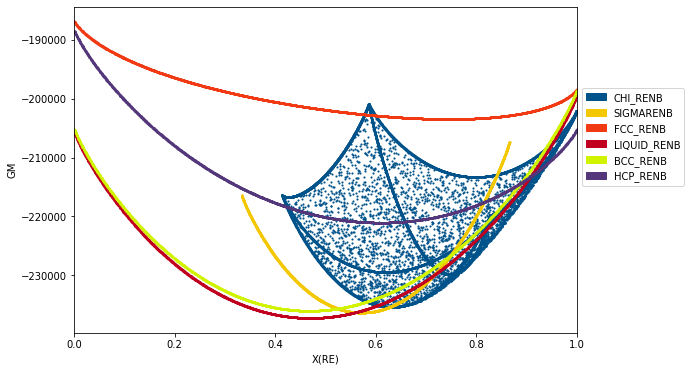

In [24]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

# Loop over phases, calculate the Gibbs energy, and scatter plot GM vs. X(RE)
for phase_name in phases:
    result = calculate(tdb, ['NB', 'RE'], phase_name, P=101325, T=2800, output='GM')
    ax.scatter(result.X.sel(component='RE'), result.GM, marker='.', s=5, color=color_dict[phase_name])

# Format the plot
ax.set_xlabel('X(RE)')
ax.set_ylabel('GM')
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()